In [67]:
#Loading libraries 
import imageio
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img


In [82]:
img = cv2.imread(r'/content/drive/MyDrive/input.png')
height, width, channels = np.shape(img)
#for i in width:
#    for j in height:
#        pixel = img[j][i] # Read the pixel at location (i,j)
        #img[j][i] = newValue # Assign a new value to the pixel



In [83]:
#To  randomly select K data points for K centrods. Then it will give K initial centrods

def initialize_random_centroids(X,K):
    points = np.reshape(img, (height * width, channels)) 
    print('points.shape',points.shape)
    m, n = points.shape
    
    centroids = np.zeros((K, n))
    
    for i in range(K):
        centroids[i,0] = points[np.random.choice(range(8)),0]
        centroids[i,1] = points[np.random.choice(range(10)),1]
        centroids[i,2] = points[np.random.choice(range(10)),2]
    return points, centroids

In [84]:
#To get the smallest elucidian distance from centroids and id
def cal_distance(x1,y1, x2,y2):
    dist = np.square(x1 - x2) + np.square(y1 - y2)
    dist = np.sqrt(dist)
    return dist

In [85]:
#updating centroids
def updateCentroids(points, centroids, clusterpoints, k):
    
    sumx = 0
    sumy = 0
    count = 0
              
    for j in range(len(points)):
                  
        if(clusterpoints[j] == k):
            sumx += points[j, 0]
            sumy += points[j, 1]
            count += 1
              
    if(count == 0):
        count = 1    
              
    centroids[k,0] = float(sumx / count)
    centroids[k,1] = float(sumy / count)
    return centroids

In [86]:
def k_means(points, centroids, clusters):
  
    iterations = 10 
    m, n = points.shape

    clusterpoints = np.zeros(m) 
  
    # k-means clustering
    for i in range(iterations):
  
        for j in range(len(points)):
              
            # initial value
            minv = 1000000
            temp = None
              
            for k in range(clusters):
                x1 = points[j, 0]
                y1 = points[j, 1]
                x2 = centroids[k, 0]
                y2 = centroids[k, 1]
                
                if(cal_distance(x1, y1, x2, y2) < minv):         
                    minv = cal_distance(x1, y1, x2, y2)
                    clusterpoints[j] = k
                
          
        for k in range(clusters):
            centroids = updateCentroids(points, centroids, clusterpoints, k)
  
    return centroids, clusterpoints

In [87]:
#To compress image based on each pixel's centroids
def ImageCompression(centroids, clusterpoints, img):
    clusterpoints=clusterpoints.astype(int)
    reassignedPixels = centroids[clusterpoints, :]
      
    reassignedPixels = np.reshape(reassignedPixels, (height, width, channels))
    plt.imshow(reassignedPixels)
    plt.show()

points.shape (16384, 3)
[[105. 185. 219.]
 [111. 187. 223.]
 [110. 180. 230.]
 [105. 185. 228.]
 [116. 185. 228.]
 [114. 172. 230.]
 [110. 187. 225.]
 [105. 186. 225.]
 [116. 180. 228.]
 [110. 185. 218.]
 [103. 183. 228.]
 [103. 185. 230.]
 [115. 179. 228.]
 [105. 183. 218.]
 [111. 186. 219.]
 [103. 183. 230.]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


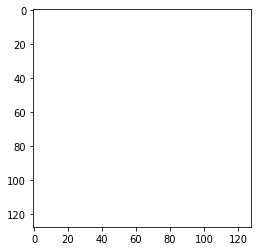

In [88]:
K=16
points, centroids=initialize_random_centroids(img,K)
print(centroids)
centroids, clusterpoints = k_means(points, centroids, K)
ImageCompression(centroids, clusterpoints, img)